In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline


In [2]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [3]:

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
import pandas as pd
y_train = pd.get_dummies(y_train.flatten())
y_test = pd.get_dummies(y_test.flatten())

In [5]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [6]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


In [7]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
i = Input(shape=(32,32,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
# x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [8]:
from keras.callbacks import ModelCheckpoint

# Define the filepath where the checkpoints will be saved
checkpoint_filepath = 'best_model.h5'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

# Add the checkpoint callback to the list of callbacks
callbacks_list = [checkpoint]

  # Add callbacks for checkpointing

history = model.fit(
    x_train, y_train, batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callbacks_list
)


Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 1.5128 - accuracy: 0.4548
Epoch 1: val_loss improved from inf to 1.26813, saving model to best_model.h5
782/782 [==============================] - 357s 454ms/step - loss: 1.5128 - accuracy: 0.4548 - val_loss: 1.2681 - val_accuracy: 0.5596
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - ETA: 0s - loss: 1.1455 - accuracy: 0.5935
Epoch 2: val_loss improved from 1.26813 to 1.16783, saving model to best_model.h5
782/782 [==============================] - 364s 466ms/step - loss: 1.1455 - accuracy: 0.5935 - val_loss: 1.1678 - val_accuracy: 0.5856
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 0.9749 - accuracy: 0.6557
Epoch 3: val_loss improved from 1.16783 to 0.92051, saving model to best_model.h5
782/782 [==============================] - 376s 481ms/step - loss: 0.9749 - accuracy: 0.6557 - val_loss: 0.9205 - val_accuracy: 0.6774
Epoch 4/50
782/782 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.7006
Epoch 4: val_loss improved from 0.92051 to 0.82296, saving model to best_model.h5
782/782 [==============================] - 349s 446ms/step - loss: 0.8518 - accuracy: 0.7006 - val_loss: 0.8230 - val_accuracy: 0.7057
Epoch 5/50
782/782 [==============================] - ETA: 0s - loss: 0.

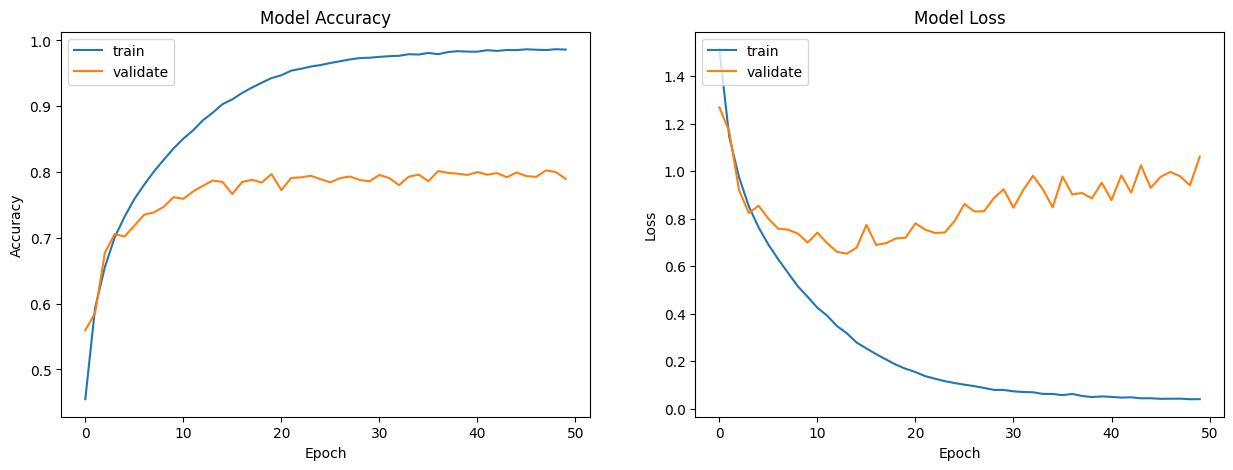

In [9]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history)


In [10]:
# Score trained model.
from keras.models import load_model
model = load_model(checkpoint_filepath)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 29s 90ms/step - loss: 0.6520 - accuracy: 0.7871
Test loss: 0.6520217061042786
Test accuracy: 0.7871000170707703
313/313 [==============================] - 20s 64ms/step


In [11]:
pred

array([[3.6293555e-03, 5.3297193e-04, 5.5339612e-04, ..., 6.7626657e-05,
        7.2591711e-04, 2.0124971e-05],
       [1.3568278e-03, 7.5602578e-03, 8.9737132e-06, ..., 4.4691355e-08,
        9.9106324e-01, 1.8999915e-06],
       [1.1161062e-02, 1.7790357e-02, 5.0921502e-05, ..., 5.5801505e-05,
        9.6990639e-01, 9.4555866e-04],
       ...,
       [3.4603431e-07, 1.0930005e-07, 1.8733416e-02, ..., 2.8735926e-04,
        2.7618707e-06, 6.3467944e-08],
       [6.6015922e-02, 7.1143526e-01, 7.4624000e-03, ..., 1.0264994e-05,
        1.4936412e-04, 1.1926455e-05],
       [2.9077529e-07, 1.3442032e-06, 4.1261857e-05, ..., 9.6881497e-01,
        4.9938294e-08, 1.6204323e-06]], dtype=float32)

In [12]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(np.array(y_test), axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]

In [13]:
print(classification_report(Y_true, Y_pred_classes))


              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.85      0.91      0.88      1000
           2       0.67      0.75      0.71      1000
           3       0.61      0.65      0.63      1000
           4       0.81      0.73      0.77      1000
           5       0.72      0.65      0.69      1000
           6       0.81      0.88      0.84      1000
           7       0.89      0.77      0.83      1000
           8       0.87      0.89      0.88      1000
           9       0.87      0.82      0.84      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



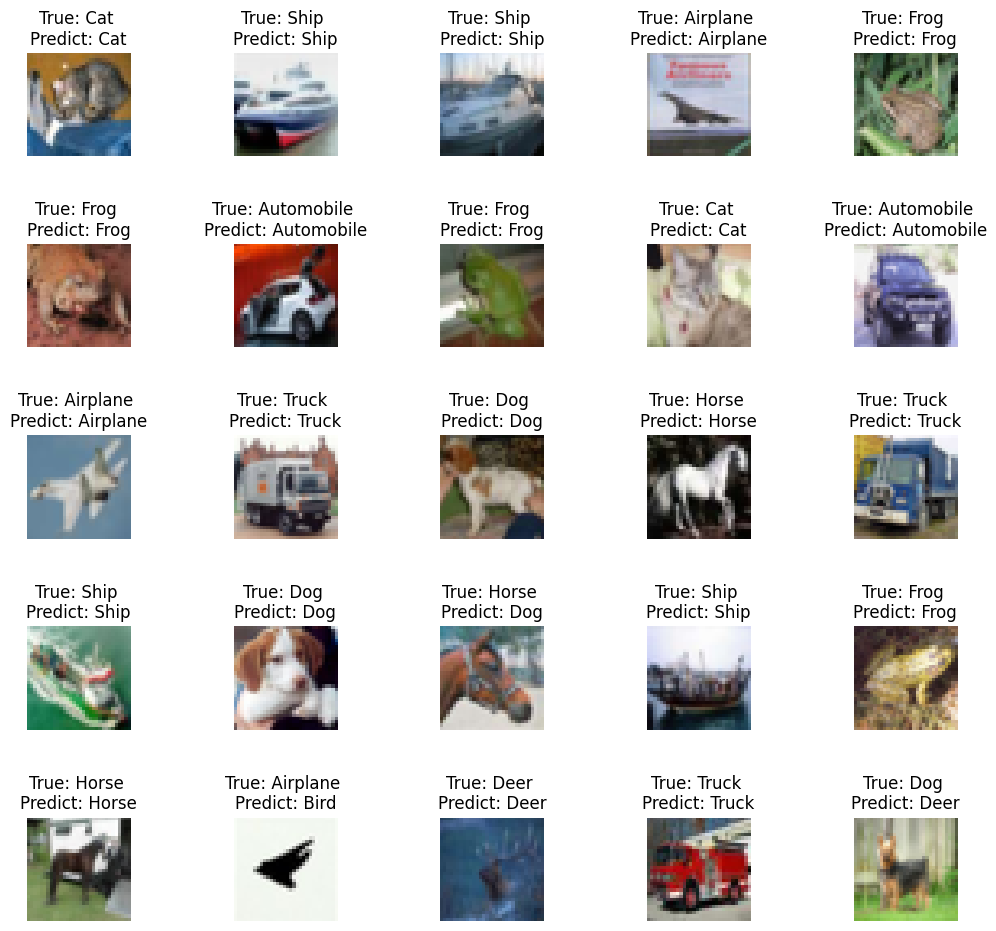

In [14]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
